In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime

START_DATE = "2024-01-01"
WINDOW_SIZE = 120
LAG = 10
TICKER = "QQQ"

ticker = yf.download(TICKER, start=START_DATE)

C:\Users\limm1\AppData\Local\Temp\ipykernel_23848\1791552668.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download(TICKER, start=START_DATE)
[*********************100%***********************]  1 of 1 completed


In [21]:
ticker.columns = ticker.columns.get_level_values(0)
ticker['Return'] = np.log(ticker['Close']/ticker['Close'].shift(1))
ticker['Autocorr'] = ticker['Return'].rolling(window=WINDOW_SIZE).apply(lambda x: x.autocorr(lag=LAG), raw=False)

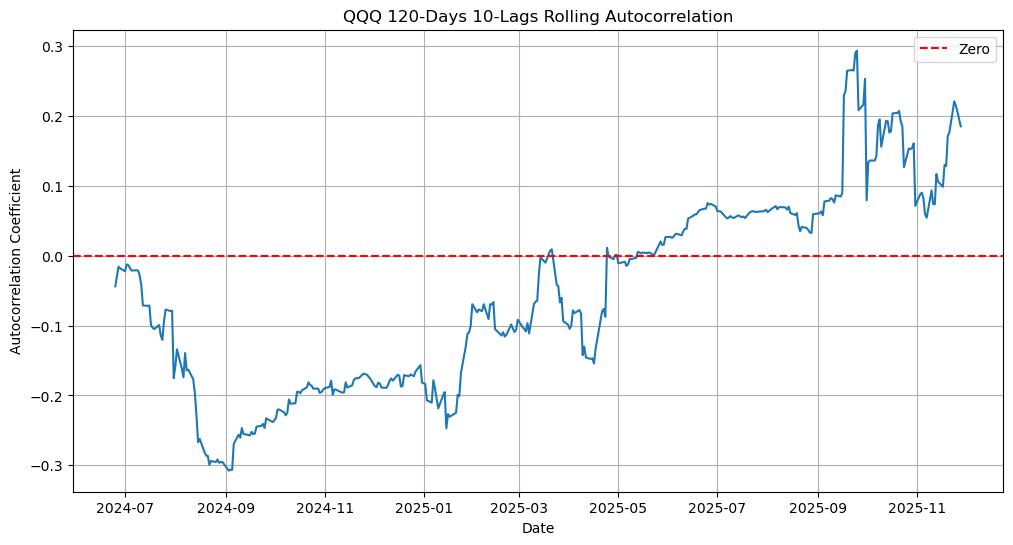

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ticker.index, ticker['Autocorr'])
plt.axhline(y=0, color='r', linestyle='--', label='Zero')
plt.title(f'{TICKER} {WINDOW_SIZE}-Days {LAG}-Lags Rolling Autocorrelation')
plt.xlabel('Date')
plt.ylabel('Autocorrelation Coefficient')
plt.legend()
plt.grid(True)
plt.show()

## 1. What is Autocorrelation?
Correlation between a stock's return time series and its lagged versions

### Three Types:
- **Positive Autocorrelation** (>0): "Trending market" - up days tend to follow up days
- **Negative Autocorrelation** (<0): "Mean-reverting market" - up days tend to follow down days  
- **Zero Autocorrelation** (≈0): "Random walk" - no relationship between consecutive returns

**Stock return autocorrelation positively predicts expected option returns**
- Positive autocorrelation → High expected option returns
- Negative autocorrelation → Low expected option returns
- Holds for both call and put options

## 2. Market Implications

### Pricing Anomaly
- **Traditional Model Flaw**: Black-Scholes assumes random walk (zero autocorrelation)
- **Market Underestimation**: Option prices don't fully reflect path-dependent risks from autocorrelation
- **Arbitrage Opportunity**: Options on trending stocks are relatively "cheap"

### Empirical Evidence

- **Data Validation**: Cross-sectional analysis shows statistically significant relationship
- **Robustness**: Holds across various option types (calls, puts, straddles)
- **Controlled Factors**: Remains significant after controlling for volatility, liquidity, etc.